# The univariate way

## Are means statistically different?

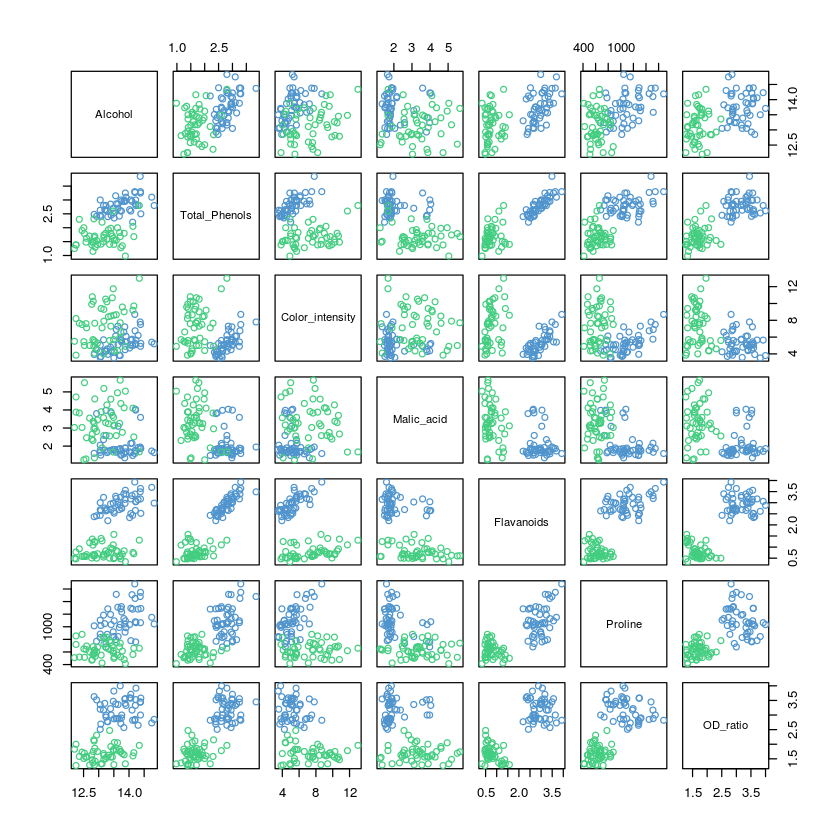

In [1]:
#We will use a subset of the wine dataset
load("data/winesmall.RData")
plot(winesmall[,c("Alcohol","Total_Phenols","Color_intensity","Malic_acid","Flavanoids","Proline","OD_ratio")], 
     col=c("steelblue3","seagreen3")[as.numeric(winesmall$Cultivar)])

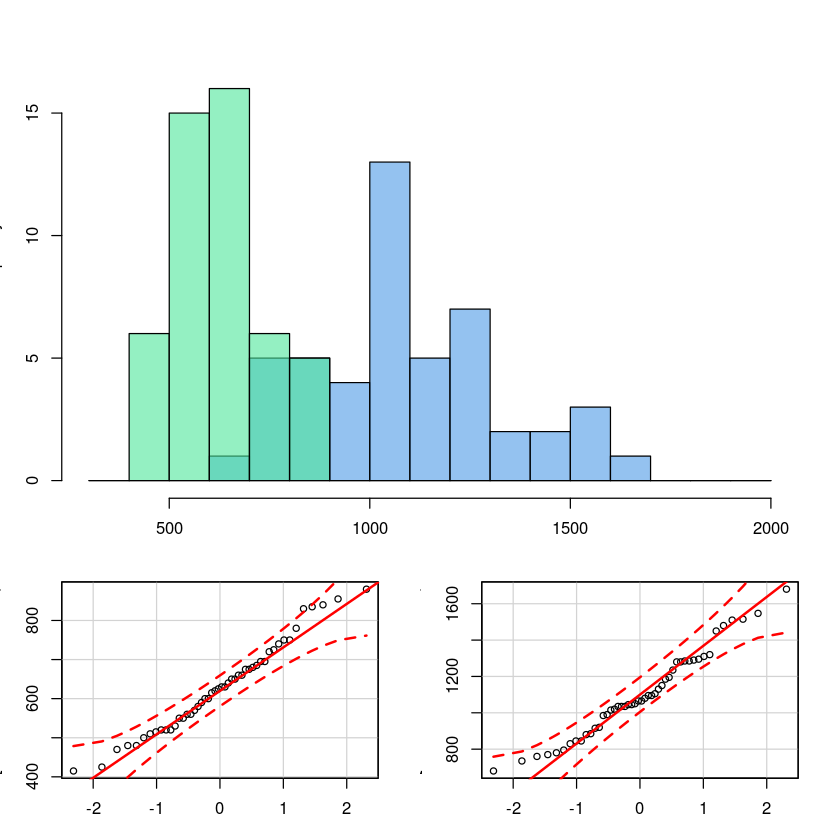

In [2]:
#before applying the t-test we should check if the test hypothesis are satisfied:

#we prepare a plot of the istogram and the quantile distribution
#the layout command is useful for putting more than one plot close together
nf <- layout(mat = matrix(c(1,1,2,3),2,2, byrow=TRUE),  height = c(2,1))
#avoids extra space around the plot
par(mar=c(3.1, 3.1, 1.1, 2.1))


hist(winesmall[winesmall$Cultivar==1,"Proline"],
     col=rgb(0.3,0.6,0.9,0.6), xlim=c(300,2000), ylim=c(0,18), 
     breaks=seq(300,2000,100), main="", xlab="Proline")
hist(winesmall[winesmall$Cultivar==3,"Proline"],
     col=rgb(0.3,0.9,0.6,0.6), xlim=c(300,2000), ylim=c(0,18),
     breaks=seq(300,2000,100), main="",  xlab="Proline", add=TRUE)


library(car)
qqp(winesmall[winesmall$Cultivar==3,"Proline"])
qqp(winesmall[winesmall$Cultivar==1,"Proline"])



In [3]:
#there is also a statistical test for checking normality
#?shapiro.test
#an effective example of how to use it
#shapiro.test(rnorm(100, mean = 5, sd = 3))
#shapiro.test(runif(100, min = 2, max = 4))

#shapiro.test(winesmall[winesmall$Cultivar==1,"Proline"])
#shapiro.test(winesmall[winesmall$Cultivar==3,"Proline"])

In [4]:
t.test(x = winesmall[winesmall$Cultivar==1,"Proline"],
       y = winesmall[winesmall$Cultivar==3,"Proline"])


	Welch Two Sample t-test

data:  winesmall[winesmall$Cultivar == 1, "Proline"] and winesmall[winesmall$Cultivar == 3, "Proline"]
t = 12.378, df = 68.015, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 394.7003 546.4247
sample estimates:
mean of x mean of y 
1100.4583  629.8958 


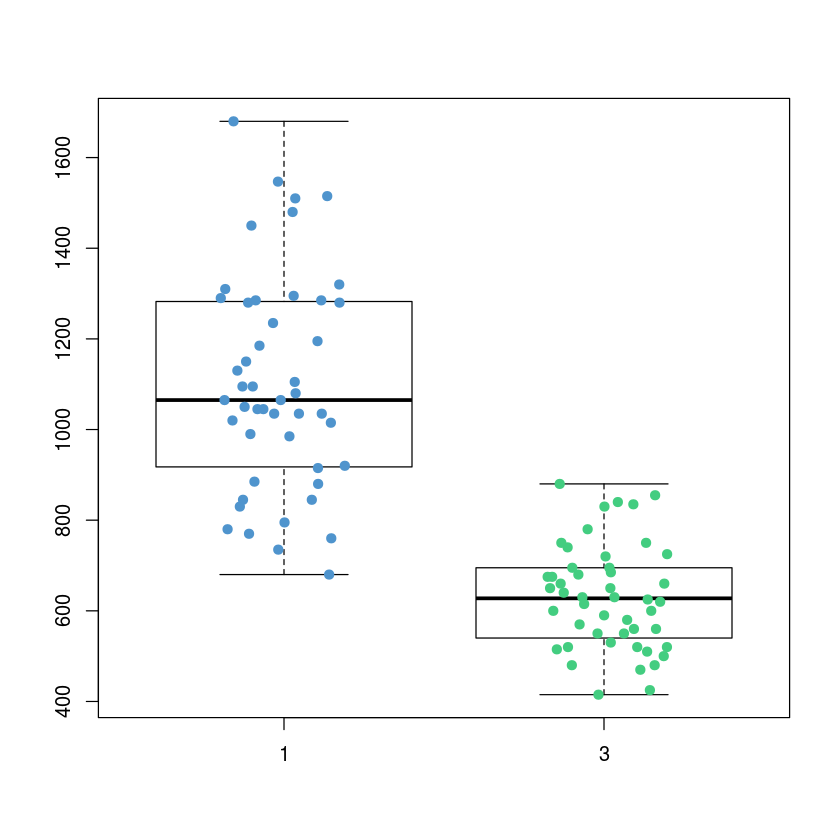

In [5]:
boxplot(winesmall$Proline~winesmall$Cultivar,outline=FALSE)
points(x=jitter(as.numeric(winesmall$Cultivar)),y=winesmall$Proline, pch=19,
       col=c("steelblue3","seagreen3")[as.numeric(winesmall$Cultivar)])

### Excercise:
##### What do you expect if you test the alchool? 


	Welch Two Sample t-test

data:  winesmall[winesmall$Cultivar == 1, "Alcohol"] and winesmall[winesmall$Cultivar == 3, "Alcohol"]
t = 5.7048, df = 93.403, p-value = 1.361e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3873530 0.8009803
sample estimates:
mean of x mean of y 
 13.74792  13.15375 


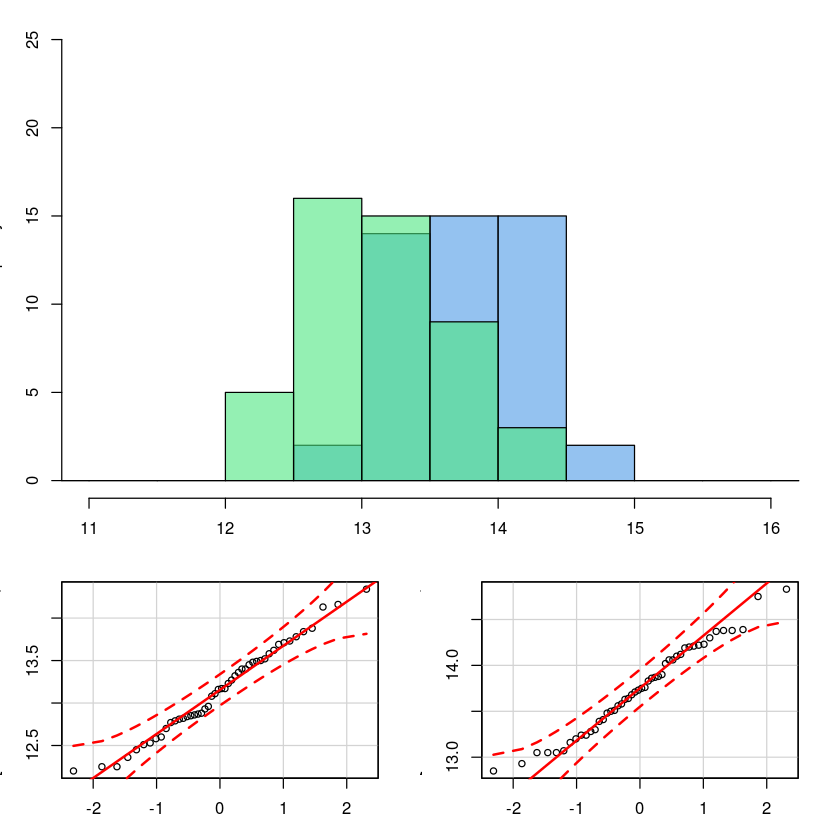

In [6]:
#Let's look at another variable: alcohol... compare the data distribution of alcohol with the one of proline
#we prepare a plot of the istogram and the quantile distribution
#the layout command is useful for putting more than one plot close together
nf <- layout(mat = matrix(c(1,1,2,3),2,2, byrow=TRUE),  height = c(2,1))
#avoids extra space around the plot
par(mar=c(3.1, 3.1, 1.1, 2.1))

hist(winesmall[winesmall$Cultivar==1,"Alcohol"],
     col=rgb(0.3,0.6,0.9,0.6), xlim=c(11,16), ylim=c(0,25), 
     breaks=seq(10,20,0.5), main="", xlab="Alcohol")
hist(winesmall[winesmall$Cultivar==3,"Alcohol"],
     col=rgb(0.3,0.9,0.5,0.6), xlim=c(11,16), ylim=c(0,25),
     breaks=seq(10,20,0.5), main="",  xlab="Alcohol", add=TRUE)


#library(car)
qqp(winesmall[winesmall$Cultivar==3,"Alcohol"])
qqp(winesmall[winesmall$Cultivar==1,"Alcohol"])

t.test(x = winesmall[winesmall$Cultivar==1,"Alcohol"],
       y = winesmall[winesmall$Cultivar==3,"Alcohol"])


## Dependence on the number of samples
How does the number of samples affect the test and the detected differences? We give a look at the sample mean distribution, which is a gaussian distribution with a given mean and standard deviation $\sigma/\sqrt(n)$. It means that as the sample size $n$ increases, the variance of the sample mean decreases. With regards to the mean instead, it can be shown (1) that the mean of the sample mean is the same as the mean of the individual samples. 
Let's try to visualize it. 

(1) https://onlinecourses.science.psu.edu/stat414/node/167


In [7]:
#how many samples do we have per class?
summary(winesmall$Cultivar)

#let's select a subset of samples N
N<-5
#remember that N must be smaller than the number of samples per class

1  3 
48 48

Playing with the number of sample you can see how the distribution of the sample mean of the Alcohol variable changes. You can also check what happens with the Proline.

In [8]:
#let's pick the first N sample of each class

sampleid1<-seq(1,N) #the first three of the first class

Nc1<-sum(winesmall$Cultivar==1) #the number of samples of the first class
sampleid3<-seq(Nc1+1,Nc1+N)#the first three of the other class


In [9]:
#Pooled standard deviation
#--------------------------
#we assume that the two population that we are comparing have the same variance 
#(i.e., the proline distribution for the two cultivars have the same variance)
#we define the function for computing the pooled estimate of the variance 

sigma.est<-function(c1,c2){ 
    num<-((length(c1)-1)*sd(c1))+((length(c2)-1)*sd(c2))
    den<-(length(c1)-1)+(length(c2)-1)
    sigma<-sqrt(num/den) #without sqrt is the pooled variance
    return(sigma/sqrt(length(c(c1,c2))))
    }


In [10]:
#sampling from both the classes

x1<-winesmall[sampleid1,"Alcohol"]
x3<-winesmall[sampleid3,"Alcohol"]

mean(x1);mean(x3)
sigma.est(x1,x3)
#sd(x1)/sqrt(length(x1)) 


[1] 13.64

[1] 12.752

[1] 0.1946025

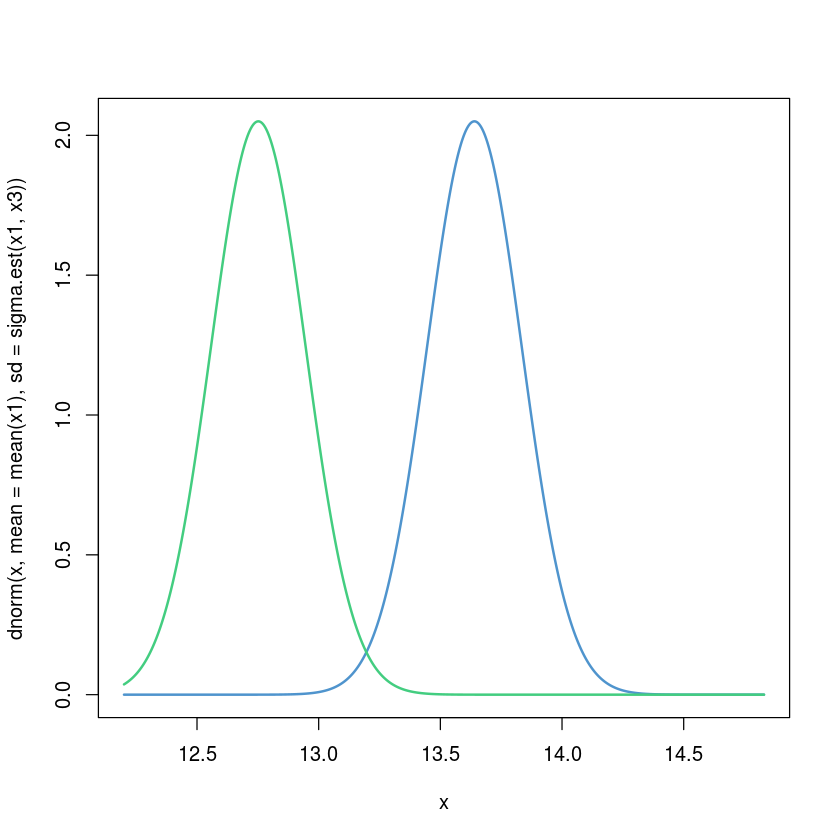

In [11]:
#estimating the sample mean distribution:

curve(dnorm(x, mean=mean(x1),sd = sigma.est(x1,x3)),
      from = min(winesmall$Alcohol), to = max(winesmall$Alcohol),n = 1000, 
      xlim=range(winesmall$Alcohol), col="steelblue3", lwd=2)
curve(dnorm(x, mean=mean(x3),sd = sigma.est(x1,x3)),add = TRUE,
      from = min(winesmall$Alcohol), to = max(winesmall$Alcohol),n = 1000,
      col="seagreen3",lwd=2)


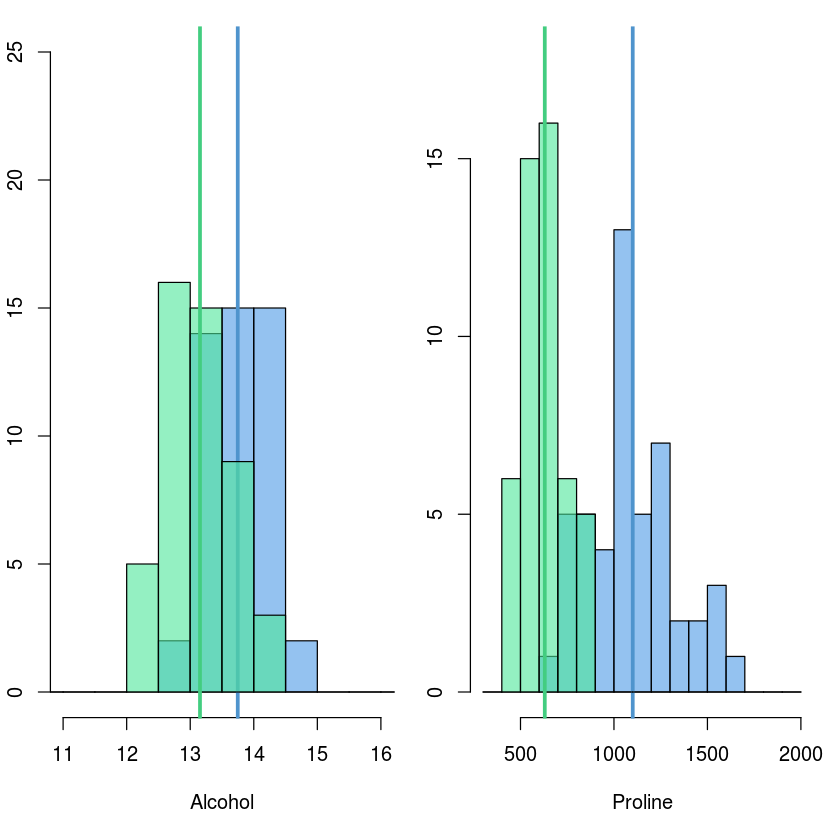

In [12]:
#Just a final thought about the diffrences between the two class for the two variables
#how do you think that such differences could impact the marker discovery process?

nf <- layout(mat = matrix(c(1,2),1,2, byrow=TRUE))
#avoids extra space around the plot
par(mar=c(5.1, 2.1, 1.1, 1.1)) #c(bottom,left, top, right)

hist(winesmall[winesmall$Cultivar==1,"Alcohol"],
     col=rgb(0.3,0.6,0.9,0.6), xlim=c(11,16), ylim=c(0,25), 
     breaks=seq(10,20,0.5), main="", xlab="Alcohol")
abline(v=mean(winesmall[winesmall$Cultivar==1,"Alcohol"]), col="steelblue3", lwd=3)
hist(winesmall[winesmall$Cultivar==3,"Alcohol"],
     col=rgb(0.3,0.9,0.6,0.6), xlim=c(11,16), ylim=c(0,25),
     breaks=seq(10,20,0.5), main="",  xlab="Alcohol", add=TRUE)
abline(v=mean(winesmall[winesmall$Cultivar==3,"Alcohol"]), col="seagreen3", lwd=3)



hist(winesmall[winesmall$Cultivar==1,"Proline"],
     col=rgb(0.3,0.6,0.9,0.6), xlim=c(300,2000), ylim=c(0,18), 
     breaks=seq(300,2000,100), main="", xlab="Proline")
abline(v=mean(winesmall[winesmall$Cultivar==1,"Proline"]), col="steelblue3", lwd=3)

hist(winesmall[winesmall$Cultivar==3,"Proline"],
     col=rgb(0.3,0.9,0.6,0.6), xlim=c(300,2000), ylim=c(0,18),
     breaks=seq(300,2000,100), main="",  xlab="Proline", add=TRUE)
abline(v=mean(winesmall[winesmall$Cultivar==3,"Proline"]), col="seagreen3", lwd=3)


### Excercise:
##### How does things change if you repeat the test for Alcohol on a subset of samples.

In [13]:
N<-3
sampleid1<-seq(1,N) #the first three of the first class

Nc1<-sum(winesmall$Cultivar==1) #the number of samples of the first class
sampleid3<-seq(Nc1+1,Nc1+N)#the first three of the other class
 
x1<-winesmall[sampleid1,"Alcohol"]
x3<-winesmall[sampleid3,"Alcohol"]

t.test(x = x1,y = x3)


	Welch Two Sample t-test

data:  x1 and x3
t = 1.9384, df = 2.0141, p-value = 0.1913
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8193024  2.1793024
sample estimates:
mean of x mean of y 
    13.53     12.85 


## Controlling false positives

We explore the problem of False Positive (FP) detection with a simulated dataset.


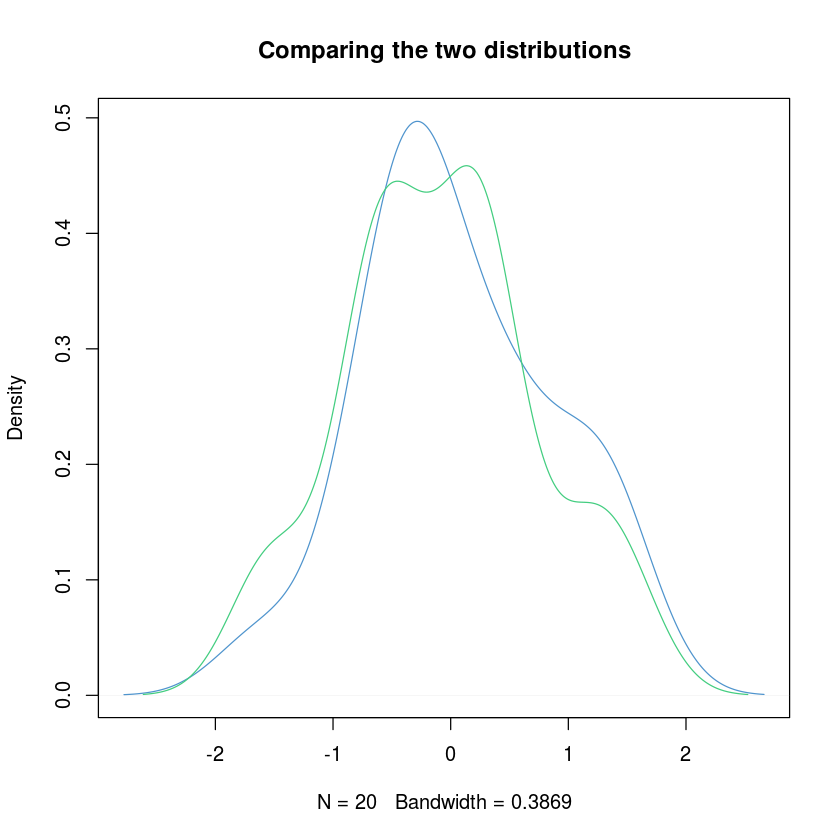

In [14]:
N<-20 #number of samples for each class
P<-1000    #number of features

set.seed(100)
c1<-matrix(rnorm(N*P),nrow=N,byrow=TRUE)
set.seed(10000)
c2<-matrix(rnorm(N*P),nrow=N,byrow=TRUE)

#how does the data looks like.. looking at the first variable
plot(density(c1[,1]), main="Comparing the two distributions", col="steelblue3")
lines(density(c2[,1]),col="seagreen3")

#the bell-shape profile is more "evident" considering the entire dataset
#plot(density(c1), main="Comparing the two distributions", col="steelblue3")
#lines(density(c2),col="seagreen3")

In [15]:
#we now perform a t-test on all the variables
pvals <- rep(0,P)
for(i in 1:P){
   pvals[i] <- t.test(x = c1[,i],y = c2[,i],
                      alternative="two.sided")$p.value  
}
summary(pvals)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001742 0.2541471 0.5330012 0.5138618 0.7586260 0.9991772 

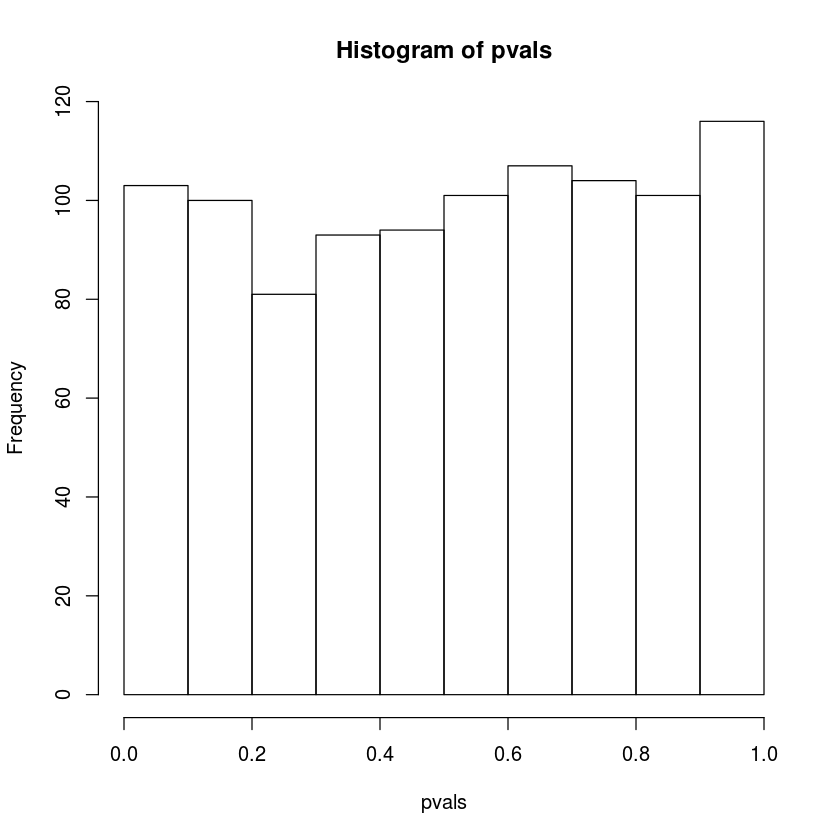

In [16]:
#P-value distribution
hist(pvals,breaks=10)

### Excercise:
##### Visualize the values of one of the possible markers (for instance, pvals<0.05).

[1] 50

 num [1:40] -2.0621 0.0319 0.4858 0.7151 -0.6082 ...


[1] 40

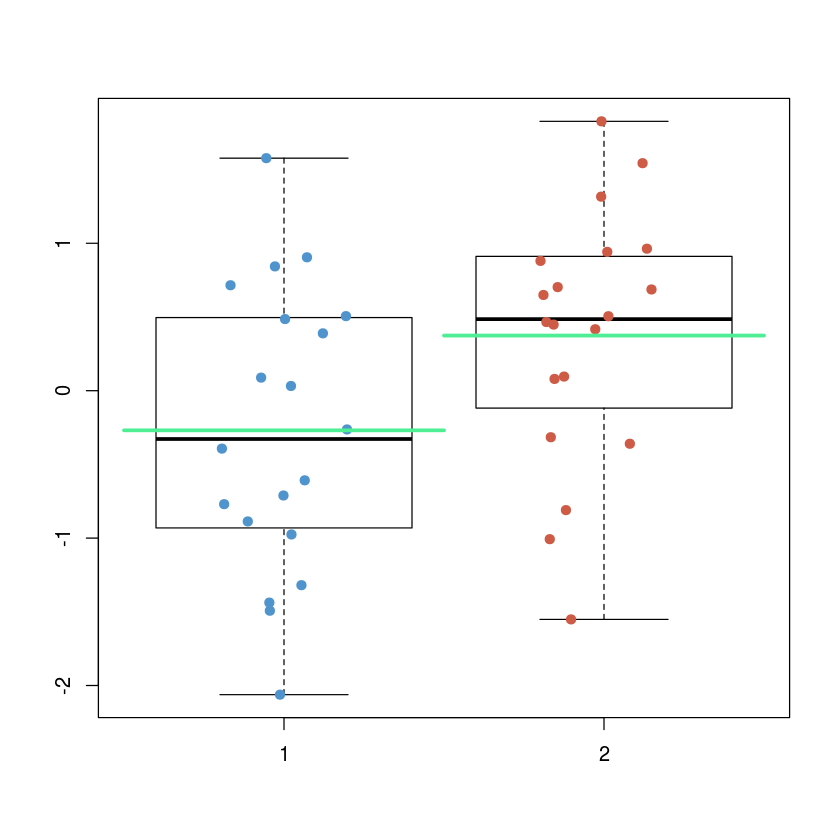

In [17]:
#let's talk about how many pass the usual threshold
id<-which(pvals<0.05)
length(id) #these are possible markers... are they reliable?

#building a vector with one of the putative markers
sel<-c(c1[,id[4]],c2[,id[4]])
str(sel)
#building the "class" vector
cl.lab<-factor(c(rep(1,N),rep(2,N)))
length(cl.lab)

boxplot(sel~cl.lab)
xpos<-jitter(rep(c(1,2),each=N))
points(x=xpos,y=sel, pch=19,
       col=c("steelblue3","coral3")[as.numeric(cl.lab)])
#we add here the means as green lines
segments(x0=1.5,x1=0.5,y0=mean(c1[,id[4]]),y1=mean(c1[,id[4]]),lwd=3,col="seagreen2")
segments(x0=1.5,x1=2.5,y0=mean(c2[,id[4]]),y1=mean(c2[,id[4]]),lwd=3,col="seagreen2")

##### What happens after multiple testing correction?

In [18]:
padj<-p.adjust(pvals,method = "bonferroni")
id2<-which(padj<0.05)
length(id2) #no markers now!

[1] 0

### Excercise:
##### Explore how things changes varying the number of samples and the number of features.

### Exercise:
##### Apply the same analysis to the metabolomics data: import the RUBUS dataset in the "rubusSmallInfo.txt" file.

R  Y 
13 12

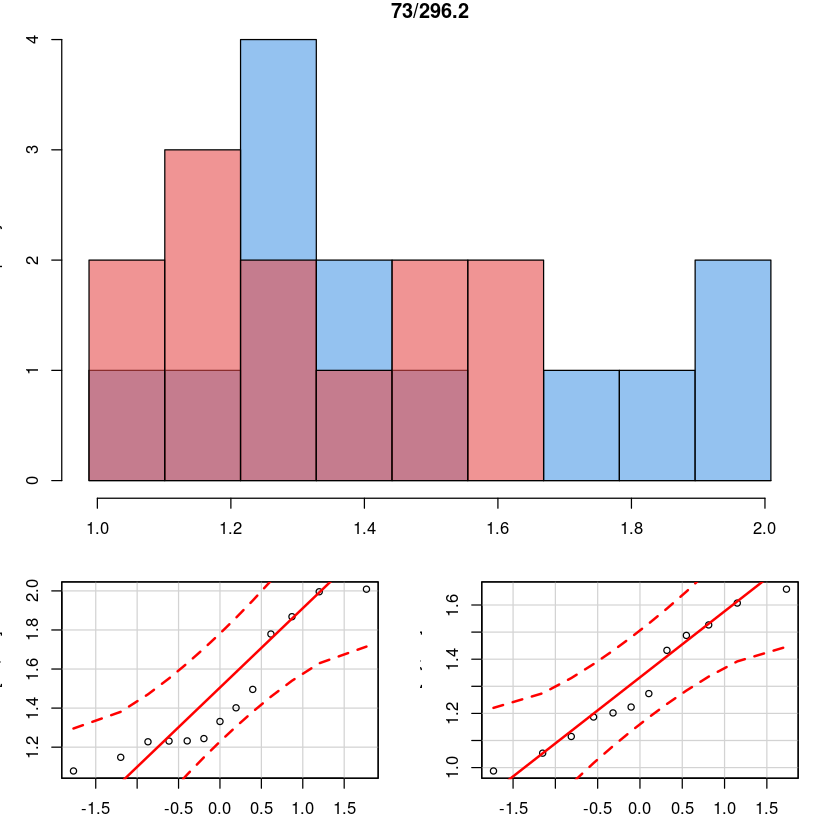

In [19]:
#load the rubus data
rubus<-read.table("data/rubusSmallInfo.txt",header=TRUE,sep="\t", check.names = FALSE)
#str(rubus)
summary(rubus$color) #the feature deciding the sample class

##selecting the samples of the two classes
idr<-which(rubus$color=="R")
idy<-which(rubus$color=="Y")

##for instance we look at one feature distribution
nf <- layout(mat = matrix(c(1,1,2,3),2,2, byrow=TRUE),  height = c(2,1))
#avoids extra space around the plot
par(mar=c(3.1, 3.1, 1.1, 2.1))

fid<-10 #we plot the fid-th feature of the dataset (metabolomics features start at column 8)

hist(rubus[idr,fid],xlim=range(rubus[,fid]),
     breaks=seq(min(rubus[,fid]),max(rubus[,fid]),length=10),
     col=rgb(0.3,0.6,0.9,0.6), main=names(rubus)[fid])
hist(rubus[idy,fid],
     breaks=seq(min(rubus[,fid]),max(rubus[,fid]),length=10),
     col=rgb(0.9,0.3,0.3,0.6), 
     add=TRUE)
library(car)
qqp(rubus[idr,fid])
qqp(rubus[idy,fid])


[1] 224

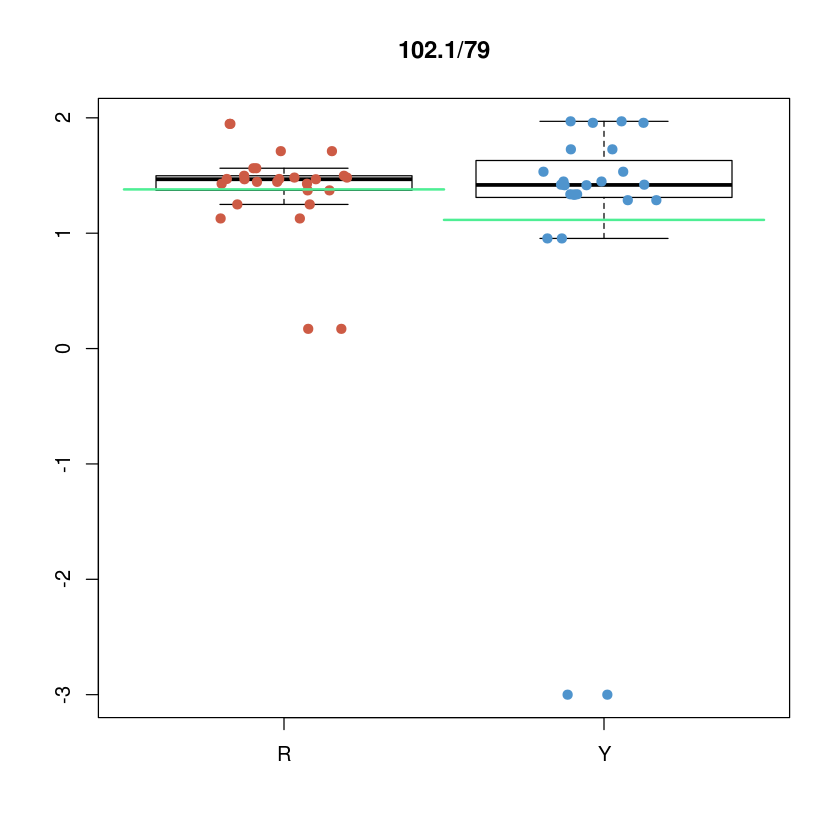

In [20]:
##we performe the t-test since the data are log10 transformed ... 
pvalt <- rep(0,ncol(rubus)-7)
for(i in 8:ncol(rubus)){
  pvalt[i-7] <- t.test(x = rubus[idr,i],y = rubus[idy,i],
                       alternative="two.sided")$p.value  
}

sum(pvalt<0.01) #this are possible markers
padjt<-p.adjust(pvalt,"bonferroni") #correcting for multiple testing. 
#Here we use Bonferroni, you can try with another strategy.

##looking at how one of the selected markers
id<-which(padjt<0.01)[1]

boxplot(rubus[,id]~rubus$color,outline=FALSE, main=names(rubus)[id],ylim=range(rubus[,id]))
for(i in 1:2){
xpos<-jitter(as.numeric(rubus$color))
points(x=xpos,y=rubus[,id], pch=19,
       col=c("coral3","steelblue3")[as.numeric(rubus$color)]) 
}
#adding the means to the plot since we are testing means...
segments(x0=1.5,x1=0.5,y0=mean(rubus[idr,id]),y1=mean(rubus[idr,id]),lwd=2,col="seagreen2")
segments(x0=1.5,x1=2.5,y0=mean(rubus[idy,id]),y1=mean(rubus[idy,id]),lwd=2,col="seagreen2")

## Non parametric tests

### EXERCISE:

##### Are the list produced by parametric and non parametric test different? Try on the RUBUS dataset just imported ("rubusSmallInfo.txt" file). You can use the wilcox.test as non parametric alternative to t.test. Please take into account that the intensities have been log transformed: in presence of ties, which is the case here,  the Wilcox test cannot compute exact p-values.

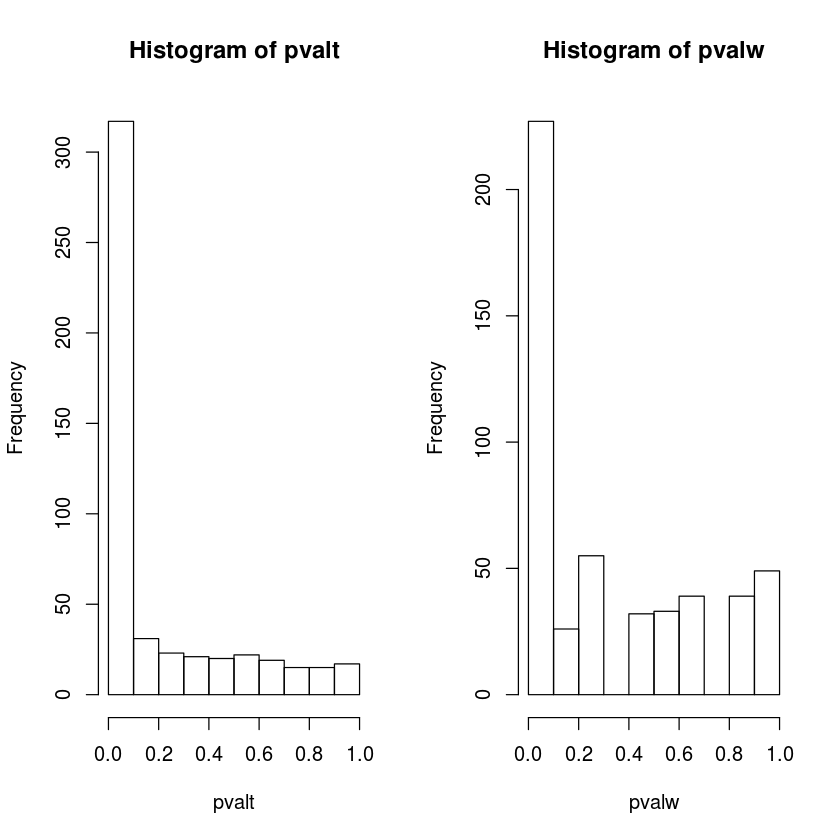

In [21]:
#load the rubus data
rubus<-read.table("data/rubusSmallInfo.txt",header=TRUE,sep="\t", check.names = FALSE)
#str(rubus)

#option one: you do it on all the samples
##selecting the samples of the two classes
#idr<-which(rubus$color=="R")
#idy<-which(rubus$color=="Y")

#option two (more interesting: let's see what happens if you have a few points)
#what changes if you select a small subset of samples
set.seed(10)
idr<-sample(which(rubus$color=="R"),5) #here we select 5 random samples per class
idy<-sample(which(rubus$color=="Y"),5)

pvalw <- rep(0,ncol(rubus)-7)
for(i in 8:ncol(rubus)){
  pvalw[i-7] <- wilcox.test(x = rubus[idr,i],y = rubus[idy,i],
                            alternative="two.sided", exact=FALSE)$p.value  
}

#let's give a look at the p-values distribution
nf<-layout(matrix(c(1,2),ncol=2))

hist(pvalt)
hist(pvalw)

In [22]:
#let's check if there are possible markers, look at 0.05 and 0.01
sum(pvalt<0.05)
sum(pvalw<0.05)

[1] 295

[1] 193

In [23]:
#what about correcting for multiple testing?
padjt<-p.adjust(pvalt,"bonferroni")
padjw<-p.adjust(pvalw,"bonferroni")

sum(padjt<0.05)
sum(padjw<0.05)

[1] 158

[1] 0